#### Author: Mr. M Belhaddad
#### 📂 Notebook Structure

#### ✅ Step 1: Data Wrangling
- Load dataset
- Check missing values & duplicates
- Validate data types
- Create new metrics:
  - CTR (Click-Through Rate)
  - CPC (Cost Per Click)
  - CPA (Cost Per Acquisition)
- Summary statistics & distributions

#### ✅ Step 2: Data Analysis (EDA)
- **Univariate analysis:** distributions of numeric features
- **Bivariate analysis:** CTR by age, gender, interest
- **Aggregations:** performance by campaign, age group, gender
- **Correlation analysis:** heatmap
- Visual insights with **Seaborn**/**Matplotlib**

#### ✅ Step 3: Insights & Recommendations
- High-performing segments
- Low-performing campaigns
- Cost efficiency (CPC, CPA)


In [541]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [543]:
df = pd.read_csv('data/conversion.csv')
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# 🕵️‍♂️ 1. Data Wrangling

### ✅ Step 1: Inspect Data

In [544]:
df.shape

(1143, 11)

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [546]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,987261.13,1067.38,133783.99,32.77,186732.13,33.39,51.36,2.86,0.94
std,193992.81,121.63,20500.31,26.95,312762.18,56.89,86.91,4.48,1.74
min,708746.00,916.00,103916.00,2.00,87.00,0.00,0.00,0.00,0.00
25%,777632.50,936.00,115716.00,16.00,6503.50,1.00,1.48,1.00,0.00
50%,1121185.00,1178.00,144549.00,25.00,51509.00,8.00,12.37,1.00,1.00
75%,1121804.50,1178.00,144657.50,31.00,221769.00,37.50,60.02,3.00,1.00
max,1314415.00,1178.00,179982.00,114.00,3052003.00,421.00,639.95,60.00,21.00


In [547]:
# Intrest is a categorical variable representing different interest categories (eg: sports, music, travel, etc.)
df['interest'] = df['interest'].astype('object')

### ✅ Step 2: Check for Missing & Duplicate Values

In [548]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [549]:
df.duplicated().sum()

0

### ✅ Step 3: Data Distribution & Summary

C:\Users\PC-MOH\AppData\Local\Temp\ipykernel_34572\981435383.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


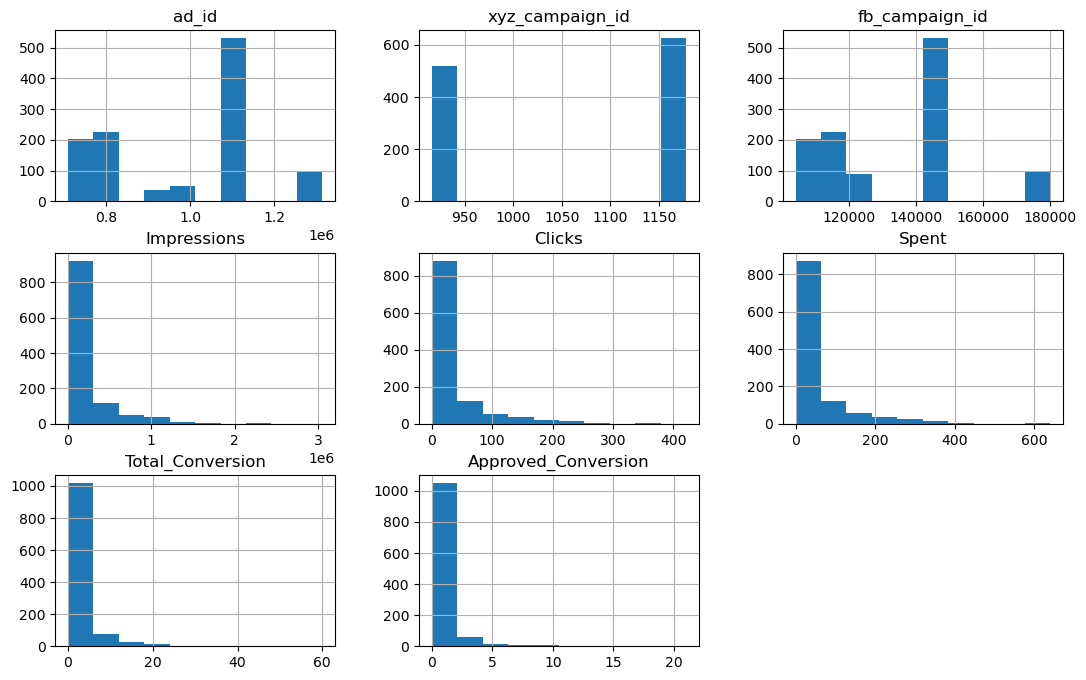

In [550]:
fig, ax = plt.subplots(figsize=(13, 8))
df.hist(ax=ax)
plt.show()

In [551]:
df['age'].value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

In [552]:
df['gender'].value_counts()

gender
M    592
F    551
Name: count, dtype: int64

In [553]:
df['interest'].value_counts().head(10)

interest
16    140
10     85
29     77
27     60
15     51
28     51
20     49
64     48
63     46
18     43
Name: count, dtype: int64

### ✅ Step 4: Create Derived Metrics

In [554]:
df['CPC'] = df['Spent'] / df['Clicks'].replace(0, np.nan)
df['CPC'] =df['CPC'].apply(lambda x: float("%.2f" % x))

In [555]:
df['CTR'] = df['Clicks'] / df['Impressions'].replace(0, np.nan) * 100
df['CTR'] = df['CTR'].apply(lambda x: float("%.4f" % x))

In [556]:
df['CPA'] = df['Spent'] / df['Approved_Conversion'].replace(0, np.nan)
df['CPA'] = df['CPA'].apply(lambda x: float("%.2f" % x))

In [557]:
df['CPM'] = df['Spent'] / df['Impressions'].replace(0, np.nan) * 1000
df['CPM'] = df['CPM'].apply(lambda x: float("%.2f" % x))

#### ✅ Step 4: Basic descriptive statistics

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   object 
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CPC                  936 non-null    float64
 12  CTR                  1143 non-null   float64
 13  CPA                  584 non-null    float64
 14  CPM                  1143 non-null   float64
dtypes: float64(5), int64(7), object(3)
mem

In [559]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CTR,CPA,CPM
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,936.00,1143.00,584.00,1143.00
mean,987261.13,1067.38,133783.99,186732.13,33.39,51.36,2.86,0.94,1.50,0.02,40.55,0.24
std,193992.81,121.63,20500.31,312762.18,56.89,86.91,4.48,1.74,0.23,0.01,54.27,0.16
min,708746.00,916.00,103916.00,87.00,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00
25%,777632.50,936.00,115716.00,6503.50,1.00,1.48,1.00,0.00,1.39,0.01,3.07,0.15
50%,1121185.00,1178.00,144549.00,51509.00,8.00,12.37,1.00,1.00,1.50,0.02,22.84,0.25
75%,1121804.50,1178.00,144657.50,221769.00,37.50,60.02,3.00,1.00,1.64,0.02,54.01,0.33
max,1314415.00,1178.00,179982.00,3052003.00,421.00,639.95,60.00,21.00,2.21,0.11,352.45,1.50


# 2. Data Analysis (EDA & Visualizations)

### # --- 1. Distribution of Impressions ---

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


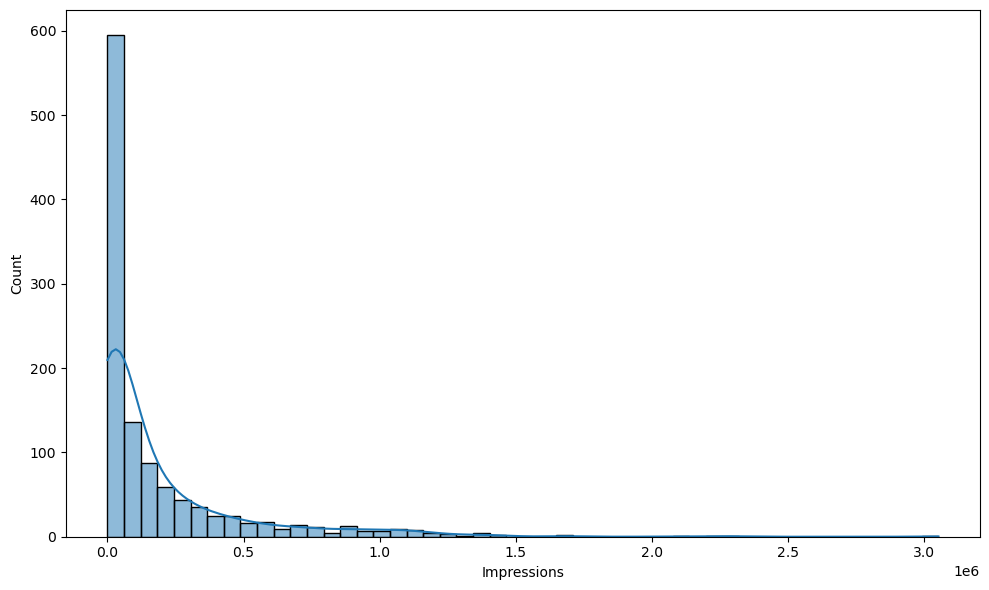

In [560]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
  data=df,
  x='Impressions',
  bins=50,
  kde=True,      # Kernel Density Estimate
  ax=ax
)
plt.tight_layout()
plt.show()

#### # --- 2. Distribution of Clicks ---


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


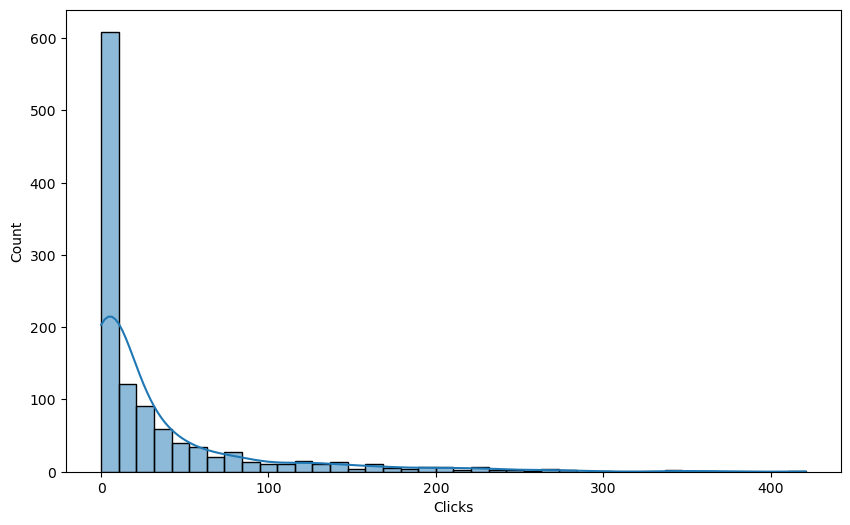

In [561]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
  data=df,
  x='Clicks',
  bins=40,
  kde=True
)
plt.show()

#### # --- 3. CTR by Age Group ---

In [562]:
age_imp_click_df = df.groupby('age').agg({'Impressions':'sum','Clicks':'sum'}).reset_index()
age_imp_click_df

,age,Impressions,Clicks
0,30-34,67993019,9483
1,35-39,42104644,7094
2,40-44,39604307,7736
3,45-49,63732858,13852


In [563]:
df_ctr_age = df.groupby('age', as_index=False)['CTR'].sum().sort_values(by='CTR')
df_ctr_age

,age,CTR
1,35-39,4.03
2,40-44,4.21
0,30-34,4.95
3,45-49,5.57


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


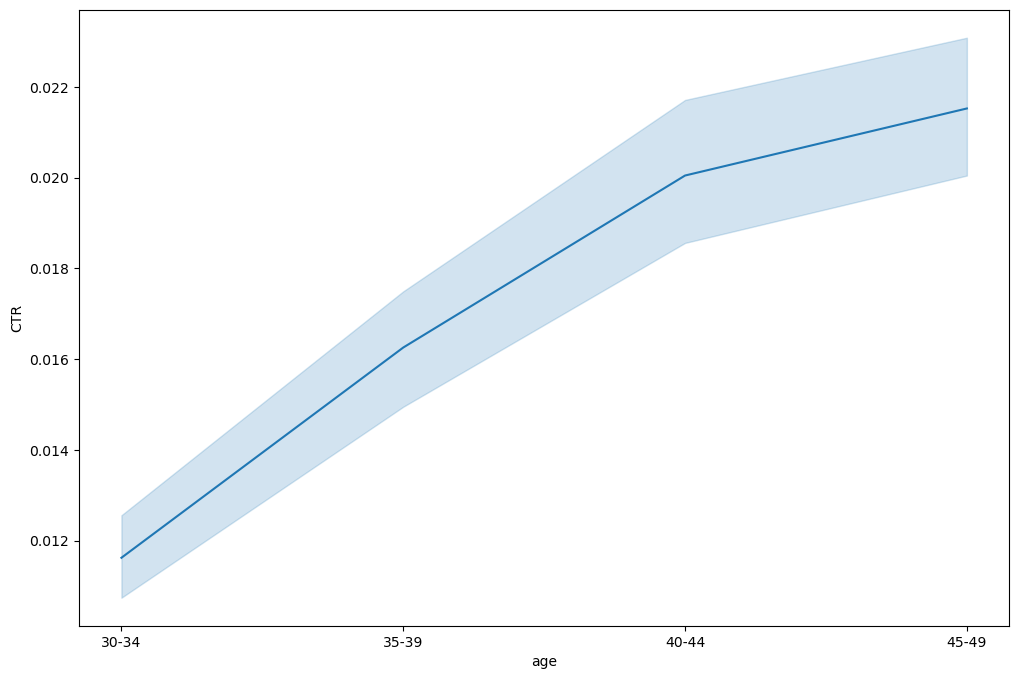

In [564]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(
  data=df,
  x='age',
  y='CTR',    # 'Mean' by default
  ax=ax
)
plt.show()

#### # --- 4. CTR by Gender ---


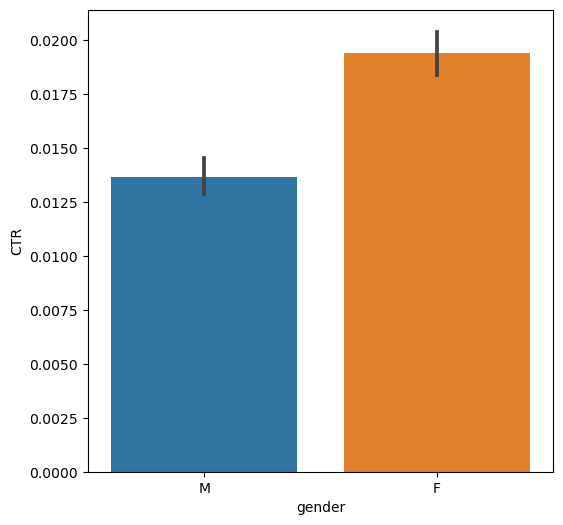

In [565]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(
  data=df,
  x='gender',
  y='CTR'
)
plt.show()

#### # --- 5. Spend vs Approved Conversions ---

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


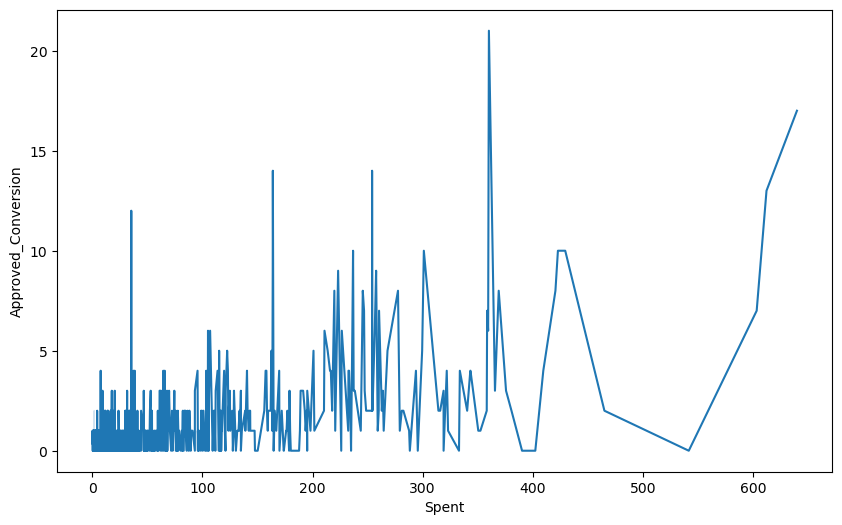

In [566]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
  data=df, 
  x='Spent',
  y='Approved_Conversion',
  ax=ax
)
plt.show()

#### # --- 6. Correlation Heatmap ---

In [567]:
corr_matrix = df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","CPC","CTR","CPA","CPM"]].corr()
corr_matrix

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CTR,CPA,CPM
Impressions,1.00,0.95,0.97,0.81,0.68,0.21,0.08,0.59,0.13
Clicks,0.95,1.00,0.99,0.69,0.56,0.11,0.16,0.68,0.20
Spent,0.97,0.99,1.00,0.73,0.59,0.17,0.14,0.67,0.19
Total_Conversion,0.81,0.69,0.73,1.00,0.86,0.16,0.01,0.22,0.05
Approved_Conversion,0.68,0.56,0.59,0.86,1.00,0.17,-0.01,0.00,0.03
CPC,0.21,0.11,0.17,0.16,0.17,1.00,-0.38,0.10,-0.03
CTR,0.08,0.16,0.14,0.01,-0.01,-0.38,1.00,0.18,0.96
CPA,0.59,0.68,0.67,0.22,0.00,0.10,0.18,1.00,0.23
CPM,0.13,0.20,0.19,0.05,0.03,-0.03,0.96,0.23,1.00


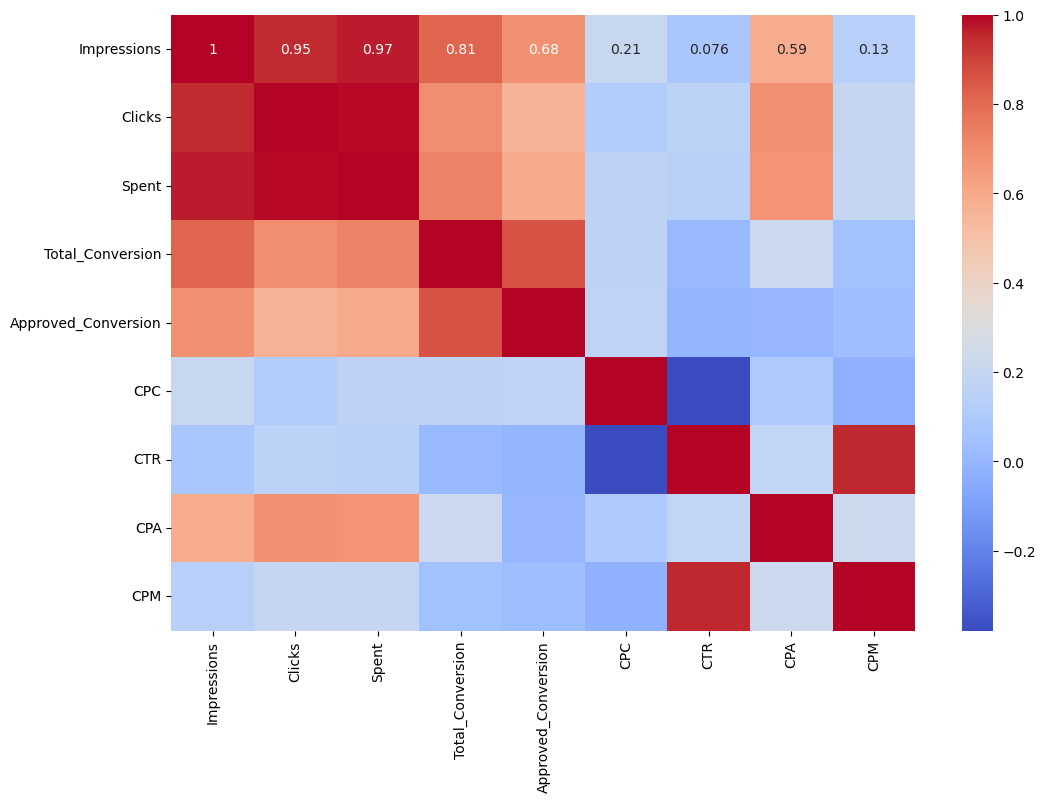

In [568]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
  data=corr_matrix,
  annot=True,
  cmap='coolwarm',
  ax=ax)
plt.show()

#### ✅ Optional: Group Analysis

In [569]:
# Performance by Age
age_group_df = df.groupby('age', as_index=False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum', 'Approved_Conversion': 'sum'}) 
age_group_df

,age,Impressions,Clicks,Spent,Approved_Conversion
0,30-34,67993019,9483,15252.40,494
1,35-39,42104644,7094,11112.43,207
2,40-44,39604307,7736,11589.73,170
3,45-49,63732858,13852,20750.67,208


In [570]:
age_group_df['CTR'] = age_group_df['Clicks'] / age_group_df['Impressions'] * 100
age_group_df['CPA'] = age_group_df['Spent'] / age_group_df['Approved_Conversion']
age_group_df

,age,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPA
0,30-34,67993019,9483,15252.40,494,0.01,30.88
1,35-39,42104644,7094,11112.43,207,0.02,53.68
2,40-44,39604307,7736,11589.73,170,0.02,68.17
3,45-49,63732858,13852,20750.67,208,0.02,99.76


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


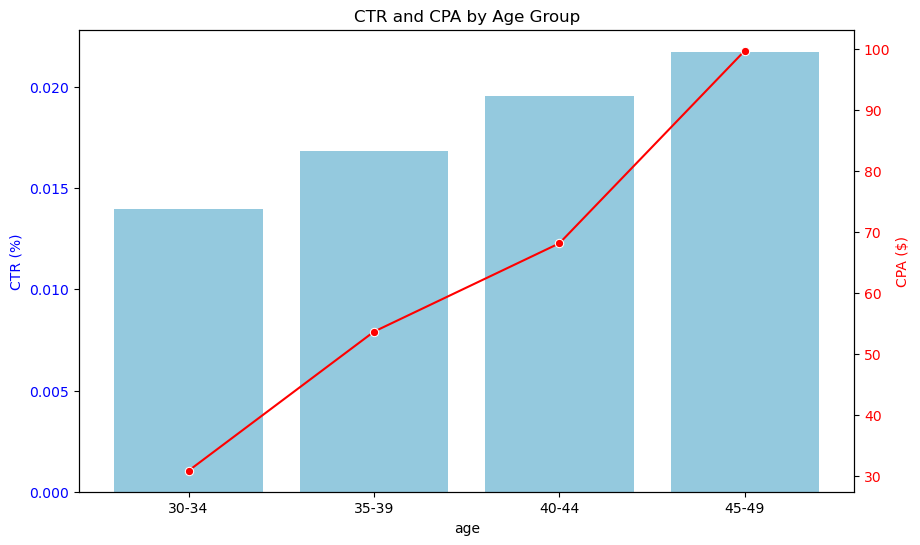

In [573]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for CTR (left axis)
sns.barplot(data=age_group_df, x='age', y='CTR', ax=ax1, color='skyblue')
ax1.set_ylabel('CTR (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for CPA (right axis)
ax2 = ax1.twinx()

sns.lineplot(data=age_group_df, x='age', y='CPA', ax=ax2, color='red', marker='o')
ax2.set_ylabel('CPA ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('CTR and CPA by Age Group')
plt.show()